In [93]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.stattools import acf, pacf
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Librerias para implementar redes neuronales
import random
import sklearn
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
register_matplotlib_converters()

In [24]:
def get_stationarity(timeseries, key):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Media Móvil')
    std = plt.plot(rolling_std, color='black', label='Desviación Estándar Móvil')
    plt.legend(loc='best')
    plt.title('Media Móvil y Desviación Estándar Móvil')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries[key])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

# Serie - precio gasolina regular

In [32]:
superior_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
superior_df = superior_df.drop(['tipo_cambio', 'regular', 'diesel', 'bunker', 'cilindro'], axis = 1)

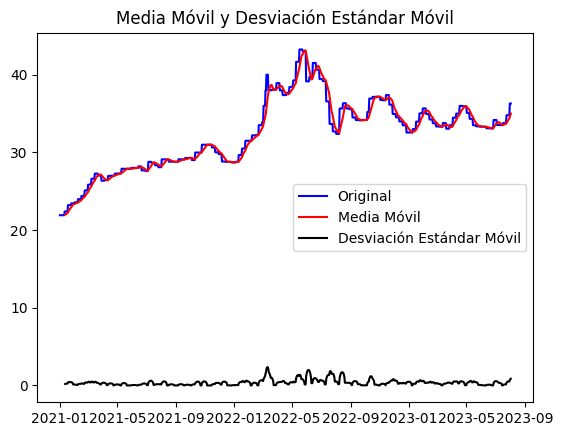

ADF Statistic: -2.35090680623804
p-value: 0.15607446419325105
Critical Values:
	1%: -3.43735568849112
	5%: -2.864632808981867
	10%: -2.5684167960132225


In [33]:
get_stationarity(superior_df, 'superior')

El valor p es mayor a 0.05, por lo tanto la serie no es estacionaria.

# Serie - Precio Gasolina regular

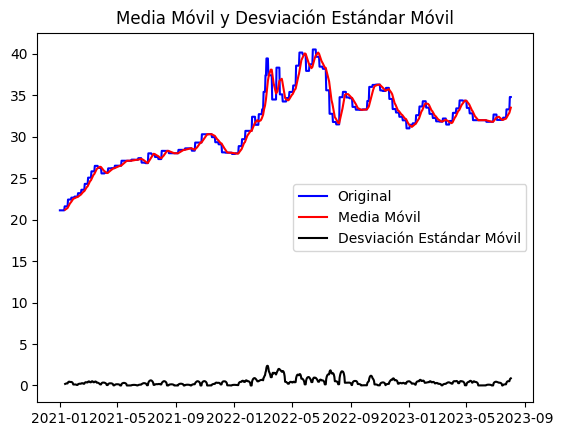

ADF Statistic: -2.211414480259752
p-value: 0.20212877347831437
Critical Values:
	1%: -3.437439232284603
	5%: -2.8646696476686477
	10%: -2.5684364181154127


In [35]:
regular_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
regular_df = regular_df.drop(['tipo_cambio', 'superior', 'diesel', 'bunker', 'cilindro'], axis = 1)
get_stationarity(regular_df, 'regular')


El valor p es mayor a 0.05, por lo tanto la serie no es estacionaria.

# Serie - Precio Diesel

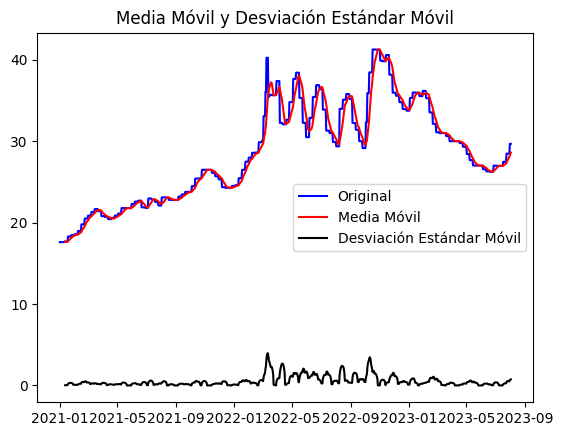

ADF Statistic: -1.966137082928931
p-value: 0.3016152633723686
Critical Values:
	1%: -3.437462363899248
	5%: -2.8646798473884134
	10%: -2.568441851017076


In [36]:
diesel_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
diesel_df = diesel_df.drop(['tipo_cambio', 'superior', 'regular', 'bunker', 'cilindro'], axis = 1)
get_stationarity(diesel_df, 'diesel')

El valor p es mayor a 0.05, por lo tanto la serie no es estacionaria.

# Serie - Precio Bunker

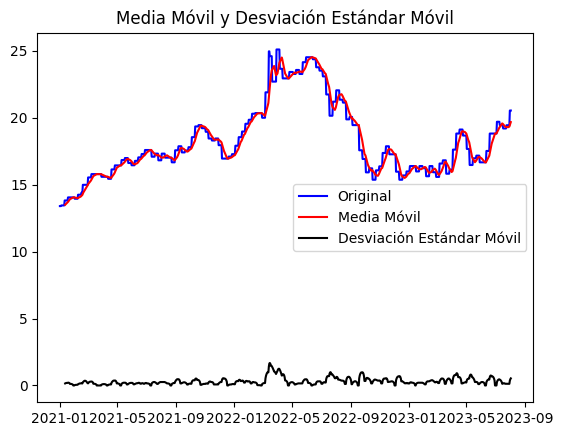

ADF Statistic: -1.990639766950217
p-value: 0.29069225613028904
Critical Values:
	1%: -3.437423894618058
	5%: -2.864662884591462
	10%: -2.5684328157550835


In [37]:
bunker_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
bunker_df = bunker_df.drop(['tipo_cambio', 'superior', 'regular', 'diesel', 'cilindro'], axis = 1)
get_stationarity(bunker_df, 'bunker')

El valor p es mayor a 0.05, por lo tanto la serie no es estacionaria.

# Serie - Precio cilindro de gas

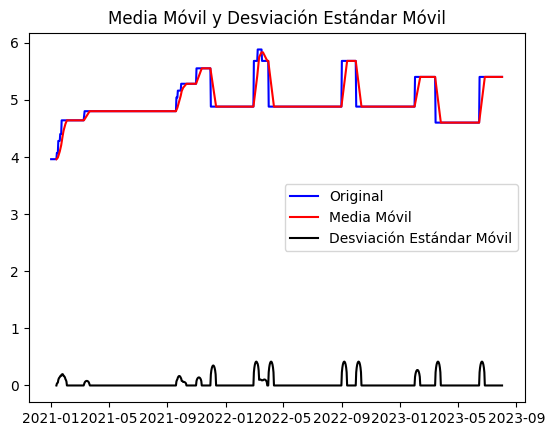

ADF Statistic: -3.8371785733492363
p-value: 0.0025490315503667793
Critical Values:
	1%: -3.437303541847512
	5%: -2.864609814371715
	10%: -2.5684045480287296


In [40]:
cilindro_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
cilindro_df = cilindro_df.drop(['tipo_cambio', 'superior', 'regular', 'diesel', 'bunker'], axis = 1)
get_stationarity(cilindro_df, 'cilindro')

# Modelos utilizando las series

## Modelo para precios de gasolina superior
- Inicio: 2021-01-01
- Fin: 2023-08-02
- Frecuencia: Diaria

### Descomponiendo el modelo
En los siguientes gráficos se demuestra cierta tendencia en el aumento de precios, por lo que deberemos de realizar transofrmaciones en la serie.

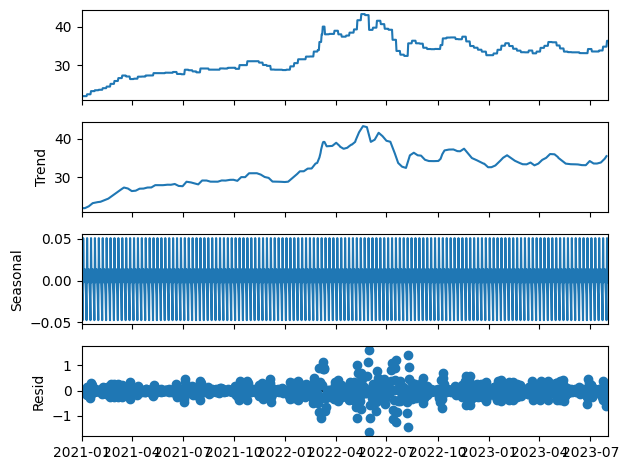

<Figure size 2000x600 with 0 Axes>

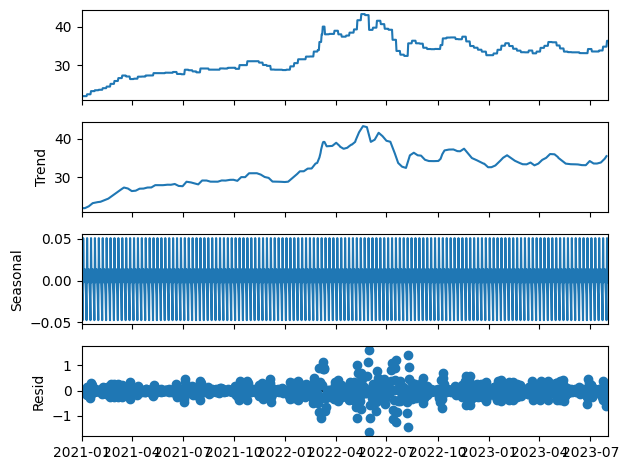

In [45]:

descomposicion = seasonal_decompose(superior_df)
plt.figure(figsize=(20,6))
descomposicion.plot()

### Estimando parametros

Estacionar la varianza

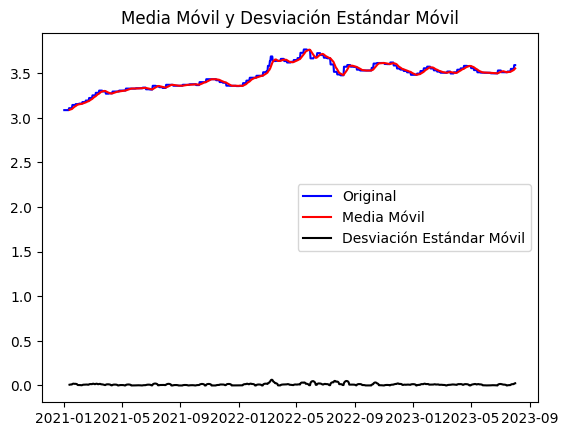

ADF Statistic: -2.5839569036364476
p-value: 0.09635858974064004
Critical Values:
	1%: -3.43735568849112
	5%: -2.864632808981867
	10%: -2.5684167960132225


In [47]:
superior_df_log = np.log(superior_df)
get_stationarity(superior_df_log, 'superior')

Estacionar la media

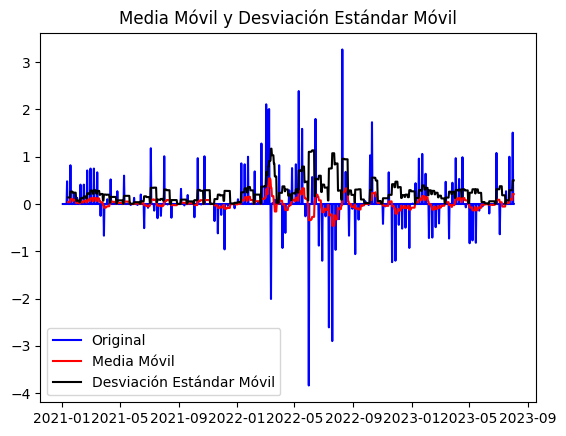

ADF Statistic: -8.572824810187873
p-value: 8.110674855908602e-14
Critical Values:
	1%: -3.43735568849112
	5%: -2.864632808981867
	10%: -2.5684167960132225


In [49]:
superior_df_diff = superior_df.diff()
superior_df_diff.dropna(inplace=True)
get_stationarity(superior_df_diff, 'superior')

Obteniendo valores (p, d, q):
- p: PACF = 1
- d: 1
- q: ACF = 1


Text(0.5, 1.0, 'Función de Autocorrelación')

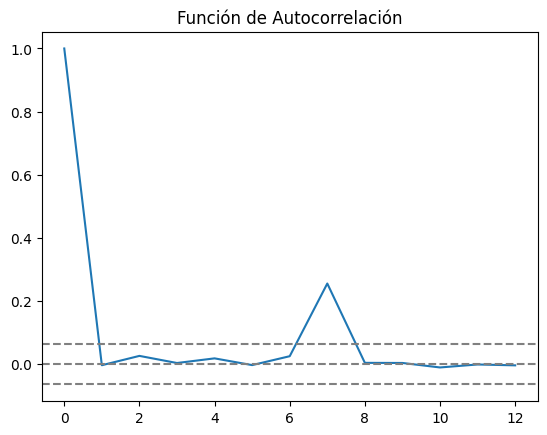

In [52]:
# Valor para p
superior_df_log_diff = superior_df_log.diff()
superior_df_log_diff.dropna(inplace = True)
tsa_acf = acf(superior_df_log_diff,nlags=12,fft=False)
tsa_pacf = pacf(superior_df_log_diff, nlags=36)


plt.plot(tsa_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(superior_df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(superior_df_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación')

Text(0.5, 1.0, 'Función de Autocorrelación')

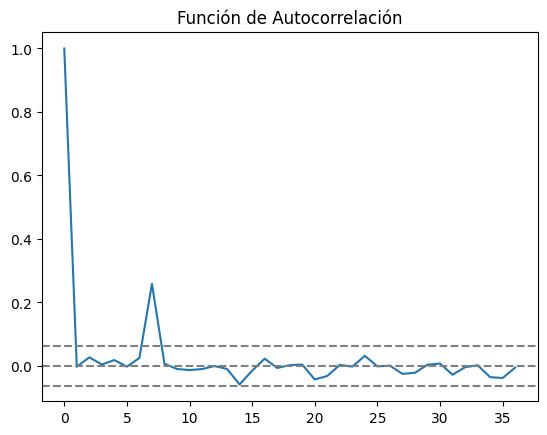

In [54]:
plt.plot(tsa_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(superior_df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(superior_df_log_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación')

/Users/guillermosantosbarrios/Developer/Universidad/2023/Data Science/Lab2_DataScience/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


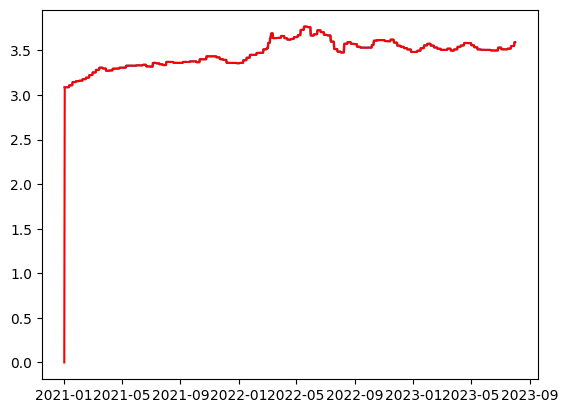

In [116]:
model = ARIMA(superior_df_log, order=(2,1,2), freq='D')
results = model.fit()
plt.plot(superior_df_log)
plt.plot(results.fittedvalues, color='red')

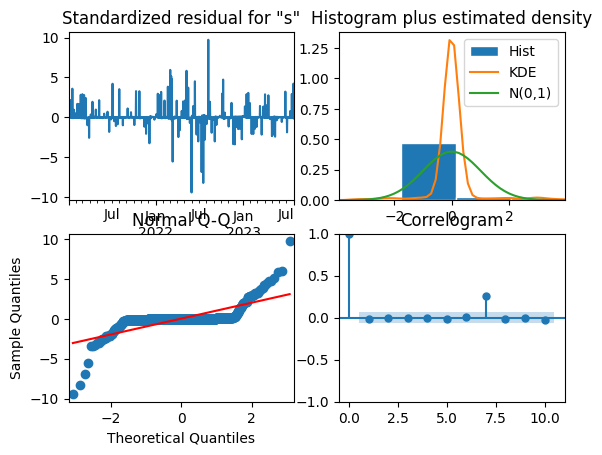

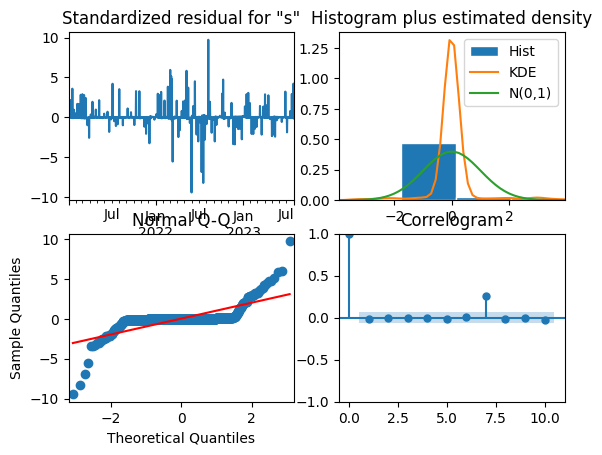

In [81]:
results.plot_diagnostics()

Los residuos no muestran una distribución normal, por lo que el modelo no será bueno generalizando la información.

/Users/guillermosantosbarrios/Developer/Universidad/2023/Data Science/Lab2_DataScience/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['plot_insample']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


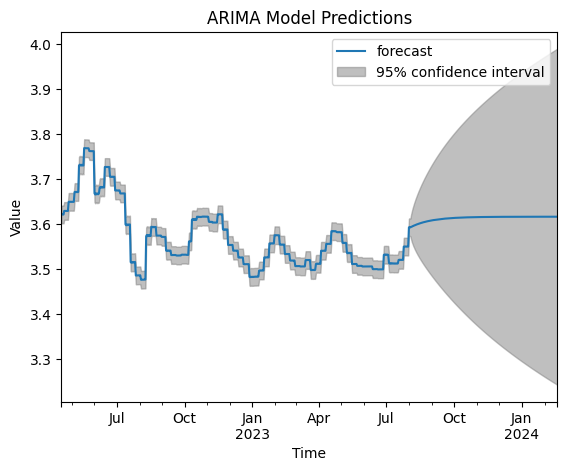

In [114]:
plot_predict(results, start=len(superior_df_log_diff)//2, end=len(superior_df_log_diff) + 200, plot_insample=True)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()


### Utilizando una red neuronal

In [92]:

superior_df = pd.read_csv('data/precios_gasolina.csv', parse_dates = ['fecha'], index_col = ['fecha'])
superior_df = superior_df.drop(['tipo_cambio', 'regular', 'diesel', 'bunker', 'cilindro'], axis = 1)

# Convert fecha column to timestamp since epoch
superior_df['fecha_epoch'] = superior_df.index.astype(np.int64) // 10**9
superior_df.head()

,superior,fecha_epoch
fecha,,
2021-01-01,21.91,1609459200
2021-01-02,21.91,1609545600
2021-01-03,21.91,1609632000
2021-01-04,21.91,1609718400
2021-01-05,21.91,1609804800


In [94]:
X = superior_df[['fecha_epoch']]
y = superior_df[['superior']]
X = np.asarray(X)
y = np.asarray(y)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)
train_labels, train_samples = shuffle(y_train,X_train )

seed_value = 2302
tf.random.set_seed(seed_value)
np.random.seed(seed_value)
random.seed(seed_value)
sklearn.utils.check_random_state(seed_value)

RandomState(MT19937) at 0x2B77EA840

In [109]:
model = Sequential([
    Dense(units=64, input_shape=(1,), activation='tanh'),
		BatchNormalization(),
    Dense(64, activation='relu'),
		BatchNormalization(),
    Dense(128, activation='relu'),
		BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(1) 
])
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=50, 
    restore_best_weights=True,
)
model.summary()
model.compile(
    optimizer='adam', loss='mean_absolute_error', 
    metrics=['mean_absolute_error']
)
batched_history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=1,
    callbacks=[early_stopping]
)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 64)                128       
                                                                 
 batch_normalization_33 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_56 (Dense)            (None, 64)                4160      
                                                                 
 batch_normalization_34 (Ba  (None, 64)                256       
 tchNormalization)                                               
                                                                 
 dense_57 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_35 (Ba  (None, 128)             

_________________________________________________________________
Epoch 1/200
15/15 [==============================] - 0s 7ms/step - loss: 32.3560 - mean_absolute_error: 32.3560 - val_loss: 32.7984 - val_mean_absolute_error: 32.7984
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 31.9699 - mean_absolute_error: 31.9699 - val_loss: 32.1986 - val_mean_absolute_error: 32.1986
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 31.1762 - mean_absolute_error: 31.1762 - val_loss: 30.8929 - val_mean_absolute_error: 30.8929
Epoch 4/200
15/15 [==============================] - 0s 2ms/step - loss: 29.6623 - mean_absolute_error: 29.6623 - val_loss: 28.4490 - val_mean_absolute_error: 28.4490
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 27.1145 - mean_absolute_error: 27.1145 - val_loss: 24.3517 - val_mean_absolute_error: 24.3517
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 23.2066 - mean_absolute_er

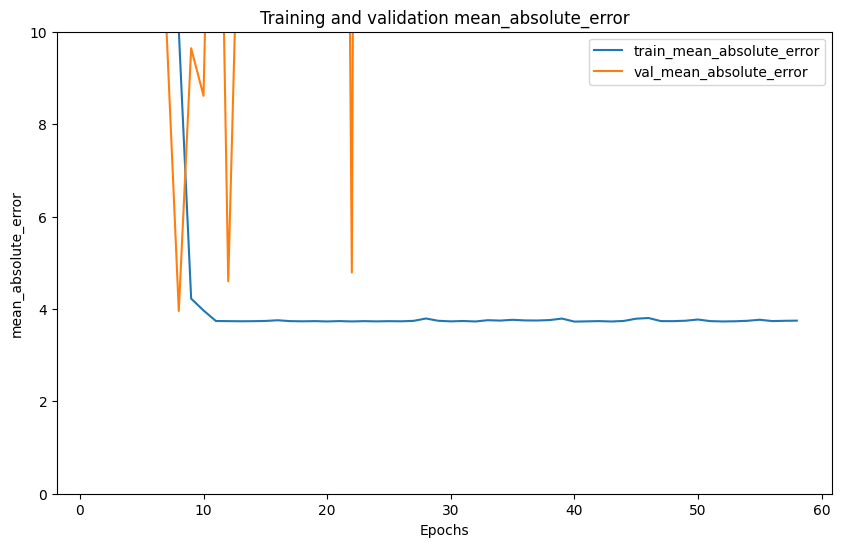

In [111]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
def plot_metric(history, metric):
		plt.figure(figsize=(10, 6))
		train_metrics = history.history[metric]
		val_metrics = history.history['val_'+metric]
		epochs = range(1, len(train_metrics) + 1)
		plt.plot(epochs, train_metrics)
		plt.plot(epochs, val_metrics)
		plt.title('Training and validation '+ metric)
		plt.xlabel("Epochs")
		plt.ylabel(metric)
		plt.legend(["train_"+metric, 'val_'+metric])
		plt.ylim([0,10])
		plt.show()
	
plot_metric(batched_history, 'mean_absolute_error')

La red neuronal no logró generalizar los resultados correctamente.

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7